# Práctica Clase 3 - Regresión Lineal y organización de código

## Clases para Dataset, Modelos, y Métricas

Nota: luego se pasarán a un módulo separado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [2]:
# Data 

class Data(object):    
    def __init__(self, path):
        self.dataset = self._build_dataset(path)        
    
    def split(self, percentage=0.8):
        """ Particiona un dataset y devuelve las dos partes
        """
        dataset_sz = self.dataset.shape[0]
        i0 = int(dataset_sz*percentage)
        indices = np.random.permutation(dataset_sz)
        training_idx, validation_idx = indices[0:i0], indices[i0:]
        return self.dataset[training_idx], self.dataset[validation_idx]
    
    def _build_dataset(self,path):
        """Construye un dataset de tipo X,Y con X de un único feature.
        """
        structure_dt = [('x', np.float32),('y', np.float32)]
        structure = np.dtype(structure_dt)
        with open(path, encoding="utf8") as dataset_csv:
            next(dataset_csv) # skip header
            gen = ((line.split(',')[1],line.split(',')[2]) for line in dataset_csv)
            samples = np.fromiter(gen, structure)
        return samples

### Models

In [3]:
# Models    
    
class BaseModel(object):
    def __init__(self):
        self.model = None
    
    def fit(self, X, Y):
        # train model
        return NotImplemented
    
    def predict(self, X):
        # return Y_hat
        return NotImplemented

In [4]:
class LinearRegressionModel(BaseModel):
    
    def __init__(self):
        BaseModel.__init__(self)
        self.model = None
    
    def fit(self, X, Y):        
        # Ver: es correcto hacer este reshaping?
        _X = np.expand_dims(X, axis=1)        
        _Y = np.expand_dims(Y, axis=1)
        
        self.W = np.linalg.inv(_X.T@_X)@(_X.T@Y).reshape(1,1) # Ver reshaping
        return self.W
    
    def predict(self, X):
        # Ver no parece estar bien este reshaping
        _X = np.expand_dims(X, axis=1)                
        return self.W@_X.T # Ver

### Metrics

In [5]:
# Metrics    
    
class Metric(object):    
    def __call__(self,target,prediction):
        return NotImplemented
    
class MSE(Metric):
    def __call__(self,target,prediction):
        assert(target.shape==prediction.shape)
        n = target.shape[0]
        return np.sum(np.square(prediction-target))/n

## Uso con dataset "Income vs. Happyness"

In [6]:
DATASET_FILENAME="income_data/income.data.csv" # income, happiness

dataset = Data(DATASET_FILENAME)
train_ds, test_ds = dataset.split()
train_ds.shape, test_ds.shape

((398,), (100,))

In [7]:
model = LinearRegressionModel()
_ = model.fit(train_ds['x'],train_ds['y'])

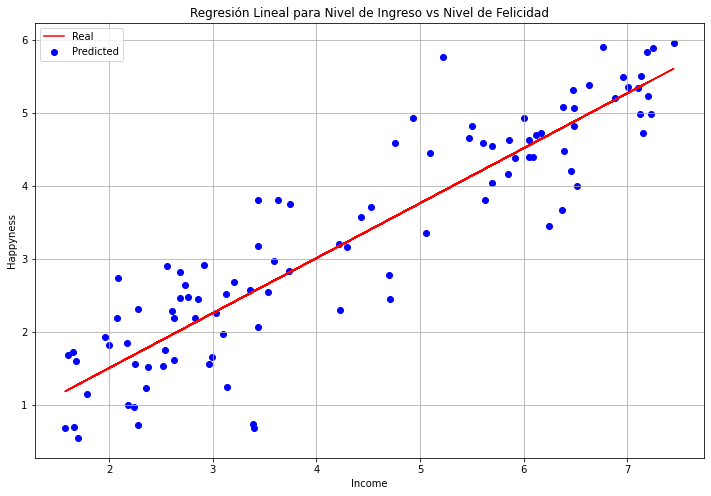

In [8]:
x_test = test_ds['x']
y_test = test_ds['y']

y_pred = model.predict(x_test)[0,:]

plt.figure(figsize=(12,8))
plt.grid(which="Both")
plt.xlabel("Income")
plt.ylabel("Happyness")
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='r')
plt.legend(["Real","Predicted"])
plt.title("Regresión Lineal para Nivel de Ingreso vs Nivel de Felicidad")
plt.show()

In [9]:
# Evaluación training set
metric = MSE()
metric(train_ds['y'], model.predict(train_ds['x'])[0,:]) # Revisar slicing

0.547610067242953

In [10]:
# Evaluación test set
metric = MSE()
metric(x_test, y_pred)

1.358495635986328